### Name : **Tazmeen Afroz**
### Roll No: **22P-9252**
### **BAI-4A**
## **LAB TASK 3 + 4**


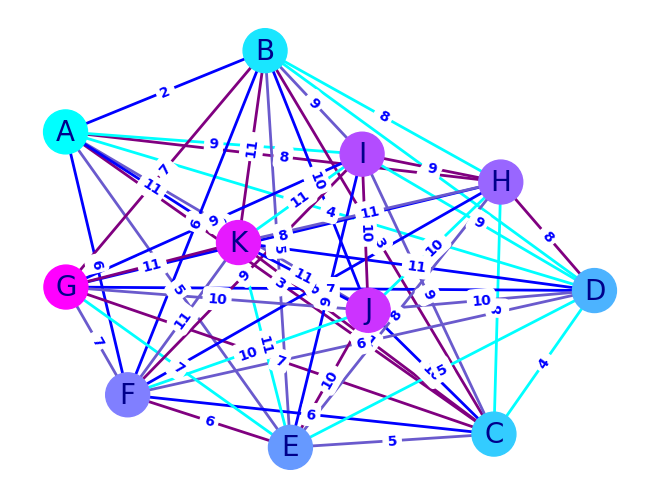

In [50]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt

df = pd.read_csv('edges.csv')

G = nx.Graph()
# Values are the weights of the edges
G.add_weighted_edges_from(df.values)

# spring_layout is used to position the nodes 
pos = nx.spring_layout(G)

# color nodes based on their degree
node_colors = range(len(G.nodes)) 

# Draw the graph 
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, edge_color= ['blue','purple','cyan','slateblue'], linewidths=1, width = 2,font_size=20, cmap='cool', font_color='darkblue')

# Draw the edge labels

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_color='blue', font_size=10, font_weight='bold')

# Show the graph
plt.figsize=(100,100)
plt.show()

In [51]:
from collections import deque


def bfs(graph, start, goal):
    # keep track of all visited nodes
    visited = set()

    # declare the queue 
    # and add the start node , with the path to it
    queue = deque([(start, [start])])
    
    # keep looping until there are nodes still to be checked
    while queue:
        node, path = queue.popleft()
        # if node is the goal, return the path
        if node == goal:
            return path
        # add the node to the visited set
        visited.add(node)
        
        for neighbor in graph.neighbors(node):
            # if neighbor has not been visited then add it to the queue
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                
       






In [52]:

def dfs(graph, start, goal):
    # keep track of all visited nodes
    visited = set()
    
    # recursive function to traverse the graph

    def dfs_recursive(node, path):
        # if node is the goal, return the path
        if node == goal:
            return path
        visited.add(node)
        
        # loop through all the neighbors of the node
        for neighbor in graph.neighbors(node):
            # if neighbor has not been visited then call the function recursively 
            if neighbor not in visited:
                new_path = dfs_recursive(neighbor, path + [neighbor])
                if new_path:
                    return new_path
                
        return None

    return dfs_recursive(start, [start])





In [53]:
import math
import queue

# Define positions for the nodes (for Euclidean distance calculation)
def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def best_first_search(graph, start, goal, heuristic):
    # keep track of all visited nodes
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    # Add the start node path and its heuristic value to the queue
    pri_queue.put((heuristic[start], [start]))  # Initial state
    
    
    while not pri_queue.empty():
        heruistic_current, current_path = pri_queue.get()
        # The last node in the current path
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)
        
        # Loop through all the neighbors of the current node
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                pri_queue.put((heuristic[neighbor], new_path))
        

    return []  # Goal not found


# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance



In [54]:


def user_choice():
    choice = ""
    source_node = input("Enter the source node:")
    goal_node = input("Enter the goal node:")
    
    # Loop to keep asking for user input
    while True:  
        print("Choose a search algorithm:")
        print("1. Breath-First Search (BFS)\n2. Depth-First Search (DFS)\n3. Best-First Search (BestFS)\n4. Exit")
        choice = int(input("Enter your choice: "))
        if choice == 1:
            path = bfs(G, source_node, goal_node)
            if path:
                print(f"BFS path from node {source_node} to node {goal_node}: {path}")
                print(f"Nodes Traced by BFS: {len(path) - 1}")
            else:
                print(f"No path found from node {source_node} to node {goal_node}.")
        elif choice == 2:
            path = dfs(G, source_node, goal_node)
            if path:
                print(f"DFS path from node {source_node} to node {goal_node}: {path}")
                print(f"Nodes Traced by DFS: {len(path) - 1}")
            else:
                print(f"No path found from node {source_node} to node {goal_node}.")
        elif choice == 3:
            heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}
            path = best_first_search(G, source_node, goal_node, heuristic)
            if path:
                print("Path from {} to {} found: {}".format(source_node, goal_node, ' -> '.join(path)))
                print(f"Nodes Traced by BestFS: {len(path) - 1}")
            else:
                print("No path found from {} to {}".format(source_node, goal_node))

        elif choice == 4:
            break  
        else: 
            print("Incorrect input. Please enter a number between 1 and 4.")

user_choice()     

Choose a search algorithm:
1. Breath-First Search (BFS)
2. Depth-First Search (DFS)
3. Best-First Search (BestFS)
4. Exit
BFS path from node A to node G: ['A', 'B', 'G']
Nodes Traced by BFS: 2
Choose a search algorithm:
1. Breath-First Search (BFS)
2. Depth-First Search (DFS)
3. Best-First Search (BestFS)
4. Exit
DFS path from node A to node G: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Nodes Traced by DFS: 6
Choose a search algorithm:
1. Breath-First Search (BFS)
2. Depth-First Search (DFS)
3. Best-First Search (BestFS)
4. Exit
Path from A to G found: A -> D -> G
Nodes Traced by BestFS: 2
Choose a search algorithm:
1. Breath-First Search (BFS)
2. Depth-First Search (DFS)
3. Best-First Search (BestFS)
4. Exit
